<font size="+1" color='#55DD44'>**Linear Regression**</font>

#### <span style="color:#22EEFF">Simplest Case</span>

Let us begin with the simplest possible regression problem: A linear system of equations such as:

$$
x = 1.25\\
x = 0.95\\
x = 1.15\\
$$

The interpretation can be as follows: due to a lack of accuracy in a sensor, each measure provides a slightly different value. We can rewrite this problem in matrix form: $Ax = b$.

$$\begin{equation*} \boxed{\newline\phantom{.}\newline\quad\underbrace{\begin{bmatrix}1\\1\\1\end{bmatrix}}_{A}x = \underbrace{\begin{bmatrix}1.25\\0.95\\1.15\end{bmatrix}}_{b}\quad\phantom{.}\newline}\end{equation*}$$

The normal equation is $A^TA x = A^T b$.

$$\begin{equation*}\boxed{\newline\phantom{.}\newline\quad\underbrace{\begin{bmatrix}1&1&1\end{bmatrix}}_{A^T}\underbrace{\begin{bmatrix}1\\1\\1\end{bmatrix}}_{A}x=\underbrace{\begin{bmatrix}1&1&1\end{bmatrix}}_{A^T}\underbrace{\begin{bmatrix}1.25\\0.95\\1.15\end{bmatrix}}_{b}\quad\phantom{.}\newline}\end{equation*}$$

<center>The solution is exactly the mean of $b$, i.e., $\mu_b = \dfrac{1.25+0.95+1.15}{3}$</center>
This implies that the solution of the normal equations provides the mean value of such measurements.

$\newline\newline$
#### <span style="color:#22EEFF">Regression for N tuples</span>

Let us go one step further and consider $N$ tuples $(x_n,y_n)$. We want to solve for $m$ and $b$ in order to attain the linear relationship
$$
mx_n +b = y_n, \;\;n=1,\ldots,N.
$$

This can easily be put in matrix form for the unknown variables $m$ and $b$.

$$
\begin{equation*}\boxed{\newline\phantom{.}\newline\quad\begin{bmatrix} x_1 & 1 \\ x_2 & 1 \\ \vdots & \vdots \\ x_N & 1 \end{bmatrix} \begin{bmatrix} m \\ b \end{bmatrix} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix}\quad\phantom{.}\newline}\end{equation*}
$$

This can easily be written in matrix form for the unknows $m$ and $b$.

\begin{equation*}\underbrace{\begin{bmatrix} x_1 & x_2 & \dots & x_N \\ 1 & 1  & \dots & 1 \end{bmatrix}}_{A^T}\underbrace{\begin{bmatrix} x_1 & 1 \\ x_2 & 1 \\ \vdots & \vdots \\ x_N & 1 \end{bmatrix}}_{A}=\begin{bmatrix}\sum_{i=1}^N x_i^2 & \sum_{i=1}^N x_i \\ \sum_{i=1}^N x_i & N \end{bmatrix}\end{equation*}

which has the normmal form as
$$
A^Tb = \begin{bmatrix} x_1 & x_2 & \dots & x_N \\ 1 & 1  & \dots & 1 \end{bmatrix} \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix} = \begin{bmatrix} \sum_{i=1}^N x_iy_i \\ \sum_{i=1}^N y_i \end{bmatrix}
$$

Hence, the unknowns $m$ and $b$ can be obtained by

\begin{equation*}\begin{bmatrix} m \\ b \end{bmatrix} = \begin{bmatrix} \sum_{i=1}^N x_i^2 & \sum_{i=1}^N x_i \\ \sum_{i=1}^N x_i & N \end{bmatrix}^{-1} \begin{bmatrix} \sum_{i=1}^N x_iy_i \\ \sum_{i=1}^N y_i \end{bmatrix}\end{equation*}

given that the inverse matrix exists. Inverting the matrix gives

\begin{equation*}\boxed{\newline\phantom{.}\newline\quad\begin{aligned}m&={\frac {\sum {x_{i}y_{i}}-{\frac {1}{N}}\sum {x_{i}}\sum {y_{i}}}{\sum {x_{i}^{2}}-{\frac {1}{N}}(\sum {x_{i}})^{2}}}={\frac {\operatorname {Cov} [x,y]}{\operatorname {Var} [x]}}\\{ {b }}&={\overline {y}}-{ {m }}\,{\overline {x}}\ \end{aligned}\quad\phantom{.}\newline}\end{equation*}

#### <span style="color:#22EEFF">Linear regression solving the normal equations</span>

In [18]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

size = np.shape(X)[0]
A = np.hstack((X.reshape(size,1),np.ones((size,1))))
b = y.reshape(size,1)

# Normal equations
A_normal = A.T @ A
b_normal = A.T @ b

sol = np.linalg.solve(A_normal, b_normal)
print('Solution: m = %.3f and b = %.3f' % (sol[0],sol[1]))

Solution: m = 86.996 and b = 2.857


#### <span style="color:#22EEFF">Linear Regression using sklearn</span>

R-Squared:  0.945 
MSE:  437.55 
Equation: y = 86.51 x + 2.45


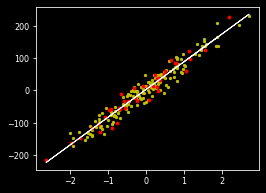

In [19]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error 
import numpy as np; import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = [4, 3]

#Creating synthetic data and splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#Defining the model and training
mod = LinearRegression()
mod.fit(X_train,y_train)

#Predicting and evaluating Score
y_pred = mod.predict(X_test)
print("R-Squared: ", round(r2_score(y_test,y_pred),3), 
      "\nMSE: ", round(mean_squared_error(y_pred,y_test),2),
     "\nEquation: y = {:.4} x + {:.3}".format(mod.coef_[0], mod.intercept_) )

#Plotting the results w/ black background
plt.style.use(['dark_background','./blackplot.mplstyle'])
ax = plt.gca()
ax.set_facecolor((0, 0, 0))
ax.yaxis.label.set_color('white')
plt.scatter(X_train,y_train,c='y',s=5); plt.scatter(X_test,y_test,c='r',s=8)
plt.plot(X,mod.predict(X),'w', lw=1);

R-Squared and MSE can be calculated mannually (without sklearn.metrics)

In [67]:
y_mean = [np.mean(y_test)]*len(y_test)
SSR = np.mean( (y_pred-y_test)**2 )
SST = np.mean( (y_test-y_mean)**2 )
R2 = 1 - SSR/SST
print( "R-Squared: {:.3}\nMSE: {:.5}".format(R2, SSR) )

R-Squared: 0.945
MSE: 437.55


**Some caveats and highlights of Linear Regression**: It <font color='#00AAFF'>can be regularized to avoid overfitting</font>. <font color='#FF4400'>Input data need to be scaled</font>. (Feature scaling improves the convergence of steepest descent algorithms, which do not possess the property of scale invariance).

#### <span style="color:#22EEFF">Linear Regression using keras</span>

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow import keras

#print(model.summary())

[array([[86.51076]], dtype=float32), array([2.4522069], dtype=float32)]


In [11]:
m = []; b = []; 
for learning_rate in [10,1,0.1,0.05,0.01]:
    model = Sequential()
    model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='linear'))
    opt = keras.optimizers.Adam(learning_rate)
    model.compile(loss='mse', optimizer=opt, metrics=['mse'])
    model.fit(x=X_train, y=y_train, batch_size=20, epochs=300, verbose=0);
    m.append(model.get_weights()[0][0][0])
    b.append(model.get_weights()[1][0])
    
for i, learning_rate in enumerate([10,1,0.1,0.05,0.01]):
    print('learning_rate = %.2f, [m,b] = [%.3f,%.3f]' % (learning_rate,m[i],b[i]) )

#### <span style="color:#22EEFF">Linear Regression using classes</span>

In [4]:
import numpy as np

class linearRegression:
    
    def __init__(self, learning_rate = 0.001, iters = 1000):
        self.lr = learning_rate
        self.n_iter = iters
        #weights
        self.w = None
        #bias
        self.b = 0
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)

        #gradient descent
        for _ in range(self.n_iter):
            y_pred = np.dot(X, self.w) + self.b
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        y_pred_ = np.dot(X, self.w) + self.b
        return y_pred_

#### <span style="color:#22EEFF">Driver test</span>

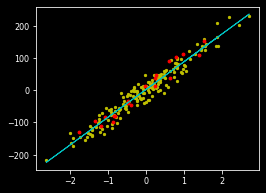

In [17]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)
X_train, y_train = X[:180], y[:180]
X_test, y_test = X[180:], y[180:]

reg = linearRegression(learning_rate=0.01, iters=1000)
reg.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(4, 3))
plt.style.use(['dark_background','./blackplot.mplstyle'])
ax = plt.gca()
ax.set_facecolor((0, 0, 0))
ax.yaxis.label.set_color('white')
plt.scatter(X_train,y_train,c='y',s=5); plt.scatter(X_test,y_test,c='r',s=8)
plt.plot(X, reg.predict(X),'c', lw=1);